
# Zillow Prize:  Zillow’s Home Value Prediction (Zestimate)

# Can Xu  ,cx461@nyu.edu


https://www.kaggle.com/c/zillow-prize-1#evaluation

Kaggle Zillow Competetion

<img src="https://www.kaggle.com/static/images/site-logo.png" height="200" width="200">


We will focus on predicting the current draw into one of the joints as a function of the robot motion.  Such models are essential in predicting the overall robot power consumption.  Several other models could also be used.

## Load and Visualize the Data
First, import the modules we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame 

%matplotlib inline

The full MERIt dataset can be obtained from the [MERIt site](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt).  But, this dataset is large.  Included in this repository are two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  We will use the following files:
* [exp1.csv](./exp1.csv) for training
* [exp2.csv](./exp2.csv) for test

Below, I have supplied the column headers in the `names` array.  Use the `pd.read_csv` command to load the data.  Use the `index_col` option to specify that column 0 (the one with time) is the *index* column.  You can review [simple linear regression demo](../simp_lin_reg/auto_mpg.ipynb) for examples of using the `pd.read_csv` command.

In [2]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
# TODO 

df = pd.read_csv('./exp1.csv',
                 header=None,names=names,na_values='?')
# df = pd.read_csv(...)
len_x = df.shape[0]

Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [3]:

df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.880000e-21,-4.940656e-321,3.910000e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.900000e-19,-6.210306e-319,4.920000e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.260000e-21,-4.940656e-321,2.630000e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.250000e-19,-1.766878e-319,-1.380000e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.470000e-22,-4.940656e-321,1.760000e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.230000e-19,-4.990557e-320,-4.120000e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.850000e-22,-4.940656e-321,1.180000e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500000e-19,-1.394253e-320,-1.170000e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310000e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.930000e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.520000e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.160000e-20,-1.141292e-321,2.930300e-01


From the dataframe `df`, extract the time indices into a vector `t` and extract `I2`, the current into the second joint.  Place the current in a vector `y` and plot `y` vs. `t`.  

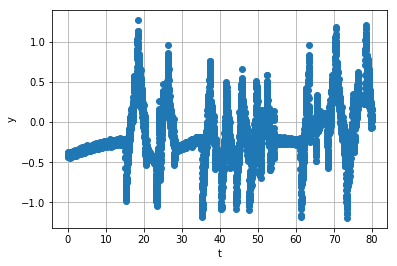

In [4]:
# TODO

xstr = 't'
t = np.array(df[xstr])
y = np.array(df['I2'])

# y = ...
# t = ...

plt.plot(t,y,'o')
plt.xlabel(xstr)
plt.ylabel('y')
plt.grid(True)

# plt.plot(...)

Use all the samples from the experiment 1 dataset to create the training data:
* `ytrain`:  A vector of all the samples from the `I2` column
* `Xtrain`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [5]:
# TODO

ytrain =  y
Xtrain = df.as_matrix(columns=['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']) 




## Fit a Linear Model
Use the `sklearn.linear_model` module to create a `LinearRegression` class `regr`.

In [6]:
from sklearn import linear_model

# Create linear regression object
# TODO
# regr = ...

regr = linear_model.LinearRegression()


Train the model on the training data using the `regr.fit(...)` method.

In [7]:
# TODO
regr.fit(Xtrain,ytrain)
regr.coef_

array([ 0.06255018,  0.20584896,  0.00118784,  0.00044457, -0.0031362 ,
        0.00603298,  0.05487097])

Plot the predicted and actual current `I2` over time on the same plot.  Create a legend for the plot.

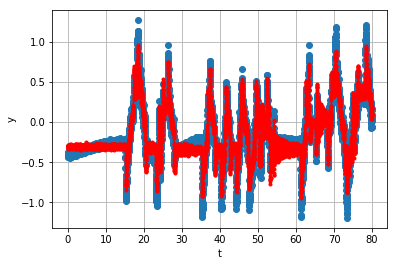

In [8]:
# TODO
y_tr_pred = regr.predict(Xtrain)

plt.plot(t,y,'o',t,y_tr_pred,'r.-')
plt.xlabel(xstr)
plt.ylabel('y')
plt.grid(True)



Measure the normalized RSS given by 
$$
    \frac{RSS}{n s^2_y}.
$$

In [9]:
# TODO
# RSS_train = ...
RSS_tr = np.mean((y_tr_pred-ytrain)**2)/(np.std(ytrain)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.095833
R^2 =            0.904167


## Measure the Fit on an Indepdent Dataset

Load the data in `exp2.csv`.  Compute the regression predicted values on this data and plot the predicted and actual values over time.

In [10]:
# TODO
df = pd.read_csv('./exp2.csv',
                 header=None,names=names,na_values='?')
# df = pd.read_csv(...)

df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,1.9024,0.26063,-0.000364,4.940656e-321,0.012596,-0.096928,-0.15134,-0.017005,-130.83,-41.856,-6.3635,5.13410,-0.045712,6.210306e-319,1.582900
1,0.01,0.000013,1.9024,0.26073,0.000739,4.940656e-321,0.012095,-0.028908,-0.11903,-0.020406,-138.18,-51.100,-14.6590,-5.05820,0.125580,1.766878e-319,0.414660
2,0.02,-0.000007,1.9024,0.26086,-0.000580,4.940656e-321,0.011596,-0.059517,-0.13944,-0.047614,-139.36,-51.812,-14.6590,-5.29520,-0.130080,4.990557e-320,0.082286
3,0.03,0.000013,1.9024,0.26099,0.001409,4.940656e-321,0.013933,-0.079923,-0.15304,-0.023807,-135.57,-48.019,-11.3410,-0.79168,0.213010,1.394253e-320,0.190650
4,0.04,-0.000007,1.9024,0.26110,-0.001273,4.940656e-321,0.010793,-0.025507,-0.12924,-0.006802,-135.81,-49.204,-12.0520,-2.21390,-0.276490,3.581976e-321,-0.170400
5,0.05,-0.000007,1.9024,0.26124,0.001928,4.940656e-321,0.011915,-0.083324,-0.14964,-0.034010,-139.60,-53.471,-16.0820,-6.95450,0.323560,1.141292e-321,0.031745


Measure the normalized RSS on the test data.  Is it substantially higher than the training data?

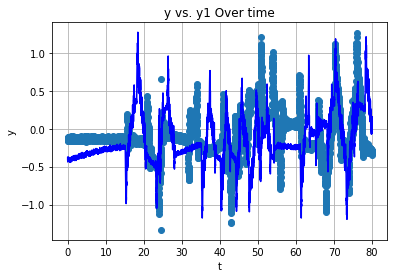

In [11]:
# TODO
# TODO

xstr = 't'
t1 = np.array(df[xstr])
y1 = np.array(df['I2'])

plt.figure(1)
plt.plot(t1,y1,'o',t,y,'b-')
plt.title('y vs. y1 Over time')
plt.xlabel(xstr)
plt.ylabel('y')
plt.grid(True)




ytrain =  y1
Xtrain = df.as_matrix(columns=['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']) 




In [12]:
print(regr.coef_);



[ 0.06255018  0.20584896  0.00118784  0.00044457 -0.0031362   0.00603298
  0.05487097]


## Measure the Fit on an Indepdent Dataset

Rsq is 0.89  near to 0.90    Both nice fit 

In [13]:
y_tr_pred = regr.predict(Xtrain)
RSS_tr = np.mean((y_tr_pred-ytrain)**2)/(np.std(ytrain)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.126780
R^2 =            0.873220


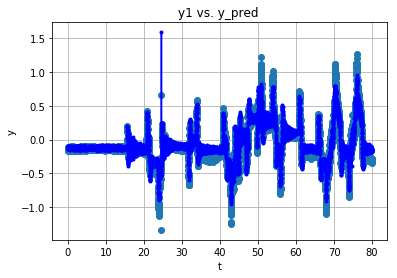

In [14]:
plt.figure(2)

plt.plot(t,y1,'o',t,y_tr_pred,'b.-')
plt.title('y1 vs. y_pred ')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)